In [ ]:
!pip3 install pandas

In [ ]:
!pip3 install prophet

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet
from datetime import datetime


In [5]:
weather_df = pd.read_csv('C:\\Users\\kzam3\\Downloads\\aiproject1\\london_weather.csv')
weather_df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [ ]:
weather_df['ds'] = pd.to_datetime(weather_df['date'], format='%Y%m%d')
weather_df.head()

In [ ]:
df_cloud_cover = weather_df[["ds","cloud_cover"]]
df_cloud_cover = df_cloud_cover.rename(columns = {"cloud_cover":"y"})
df_cloud_cover

In [ ]:
model_cloud_cover = Prophet()

In [ ]:
model_cloud_cover.fit(df_sunshine)

In [ ]:
future_cloud_cover = model_cloud_cover.make_future_dataframe(periods=5, freq="Y")

In [ ]:
forecast_cloud_cover = model_cloud_cover.predict(future_sunshine)

In [ ]:
fig_cloud_cover = model_cloud_cover.plot(forecast_cloud_cover)

In [ ]:
forecast_cloud_cover = forecast_cloud_cover.set_index("ds")
forecast_cloud_cover.head()

In [ ]:
forecast_cloud_cover[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-5:,:].plot()

In [ ]:
forecast_cloud_cover = forecast_cloud_cover.reset_index()
fig_cloud_cover_a = model_cloud_cover.plot_components(forecast_cloud_cover)

In [7]:
# Correct the renaming and conversion to datetime format
weather_df.rename(columns={'date': 'Date'}, inplace=True)  # Rename correctly first
weather_df['Date'] = pd.to_datetime(weather_df['Date'], format='%Y%m%d')  # Convert after renaming


        Date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0 2011-11-23          7.0       2.0              35.0      13.5        6.8   
1 2011-11-24          3.0       2.0              35.0      12.5        8.6   
2 2011-11-25          3.0       5.0              52.0      14.0       11.0   
3 2011-11-26          4.0       0.7              24.0      13.9       10.2   
4 2011-11-27          3.0       5.9              55.0      13.2       11.8   

   min_temp  precipitation  pressure  snow_depth     KWH  
0       2.6            0.2  102720.0         0.0   90.39  
1       3.7            0.2  102710.0         0.0  213.41  
2       9.5            0.0  102450.0         0.0  303.99  
3       6.3            0.0  102580.0         0.0  420.98  
4       9.7            0.0  102130.0         0.0  444.88  
Correlation matrix:
            mean_temp       KWH
mean_temp   1.000000 -0.105456
KWH        -0.105456  1.000000


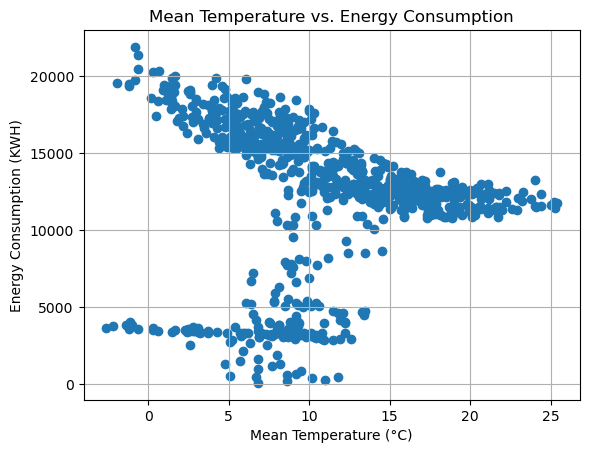

In [9]:
# Load the energy consumption data
energy_df = pd.read_csv('C:\\Users\\kzam3\\Downloads\\aiproject1\\london_energy_consumption_upload.csv')

# Convert date columns to datetime format for both dataframes
energy_df['Date'] = pd.to_datetime(energy_df['Date'], format='%m/%d/%Y')

# Merge the dataframes on the 'Date' column
merged_df = pd.merge(weather_df, energy_df, on='Date', how='inner')

# Check the first few rows to ensure it merged correctly
print(merged_df.head())

# Ensure no NaN values in 'mean_temp' and 'KWH' columns that could skew the results
merged_df.dropna(subset=['mean_temp', 'KWH'], inplace=True)

# Calculate the correlation between 'mean_temp' and 'KWH'
correlation_matrix = merged_df[['mean_temp', 'KWH']].corr()
print("Correlation matrix:\n", correlation_matrix)

# Use matplotlib for a scatter plot
plt.scatter(merged_df['mean_temp'], merged_df['KWH'])
plt.title('Mean Temperature vs. Energy Consumption')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Energy Consumption (KWH)')
plt.grid(True)  # Adds a grid to the plot for better readability
plt.show()